In [1]:
$LOAD_PATH << File.dirname(__FILE__) + "/../lib"

require 'pandas'
require 'matplotlib/iruby'
Matplotlib::IRuby.activate
pd = Pandas
plt = Matplotlib::Pyplot

require 'beer'
include Beer

#<Module:0x0000000107fc8890>

# ホップの煮沸時間とIBUの関係

In [2]:
batch_size = 5 * GALLON
og = 1.050
hop_weight = 1.5 * OZ
hop_aa = 5.6 * 0.01
concentration_factor = 0.9
desired_ibu = 25
elevation = 40

wort = Wort.new.add(batch_size, Ingredient.sg(og))
hop = Hop.new(hop_aa)

algorithms = [
  IBU::Tinseth.instance,
  IBU::Rager.instance,
  IBU::Garetz.new(concentration_factor, desired_ibu, elevation),
]

df = pd::DataFrame.new(index: (0..90).step(5).to_a)
df.index.name = "Minutes"

algorithms.map {|algorithm|
  name = algorithm.class.name.split(":").last
  df[name] = df.index.map(lambda {|mins|
    algorithm.ibu(wort, hop_weight, mins, hop)
  })
}
df["Average"] = df.mean(axis=1)
df

,Tinseth,Rager,Garetz,Average
Minutes,,,,
0,0.000000,6.419525,-4.001211,0.806104
5,5.786242,7.172740,-1.938936,3.673348
10,10.523616,8.398245,0.677193,6.533018
15,14.402250,10.314458,3.804981,9.507230
20,17.577807,13.131972,7.290133,12.666637
25,20.177733,16.921341,10.881421,15.993498
30,22.306372,21.449820,14.295937,19.350710
35,24.049155,26.156162,17.302808,22.502708
40,25.476024,30.388129,19.777095,25.213749


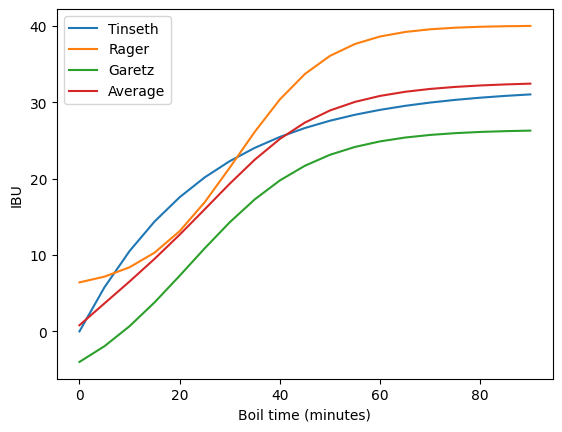

In [3]:
plt.figure
plt.plot(df, label: df.columns)
plt.legend
plt.xlabel("Boil time (minutes)")
plt.ylabel("IBU")
plt.show